<h1>The Sparks Foundation - Data Science & Business Analytics Internship</h1>
<h1>Author - Vishal Patil</h1>
<h1>Task 1- Prediction using Supervised ML</h1>

In this task we will predict the percentage of an student based on the no. of study hours.
<h1>Importing the libraries & dataset</h1>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#Observing the dataset
dataset.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
dataset.shape

(25, 2)

In [10]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
#Null values  in dataset

dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [14]:
dataset.iloc[1:7]

,Hours,Scores
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


<h1>Data Visulisation</h1>

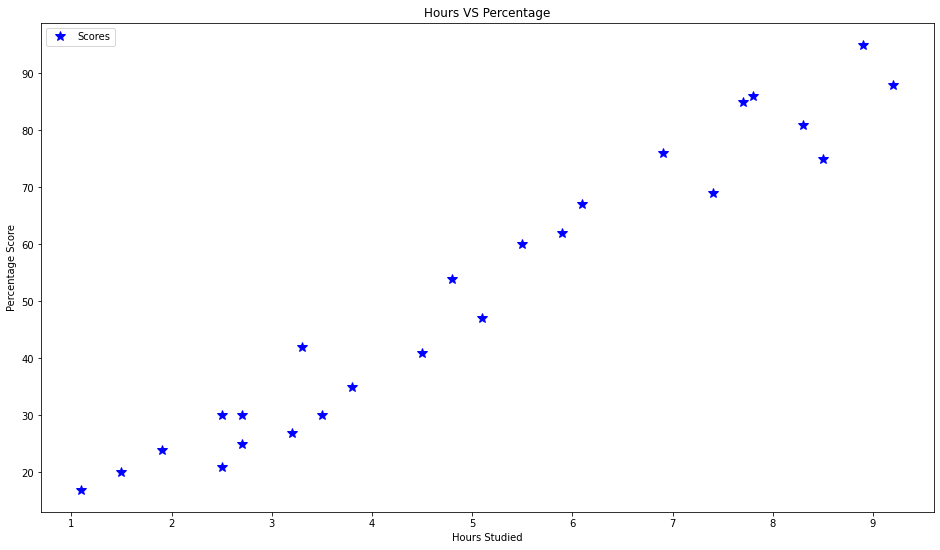

In [17]:
#Plotting the dataset

dataset.plot(x='Hours',  y='Scores' , style='*' , color='blue' , markersize=10)
plt.title("Hours VS Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

<h1>Data preparation</h1>
Spliting data into "features"(inputs) and "labels"(outputs) After that we will split the whole dataset into two parts - testing data and training data.

In [19]:
x=dataset.iloc[:, :1].values
y=dataset.iloc[:, 1:].values

In [20]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [21]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 ,random_state =0)

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

<h1>Training Completed</h1>

<h1>Visualizing the model</h1>

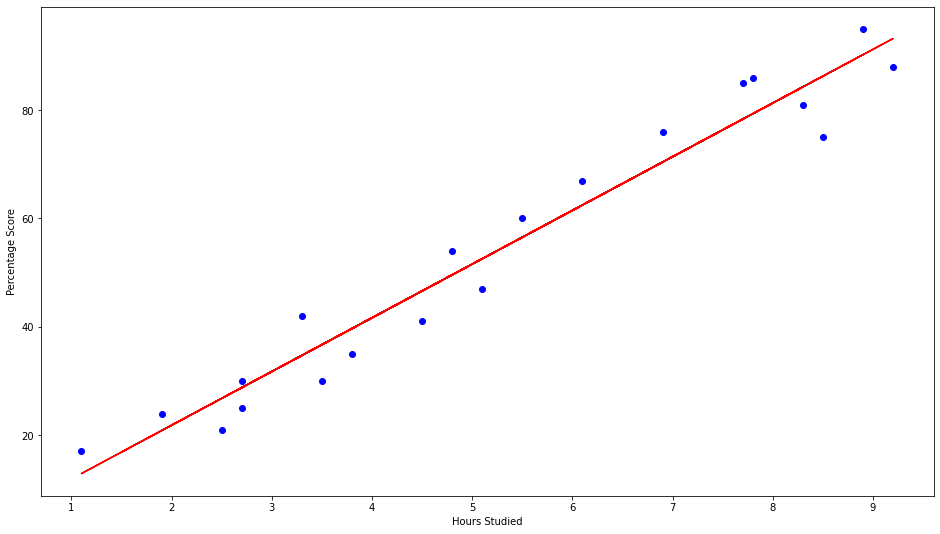

In [27]:
line = regressor.coef_*x + regressor.intercept_

#Plotting for training data

plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x_train, y_train, color="blue")
plt.plot(x, line, color="red")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

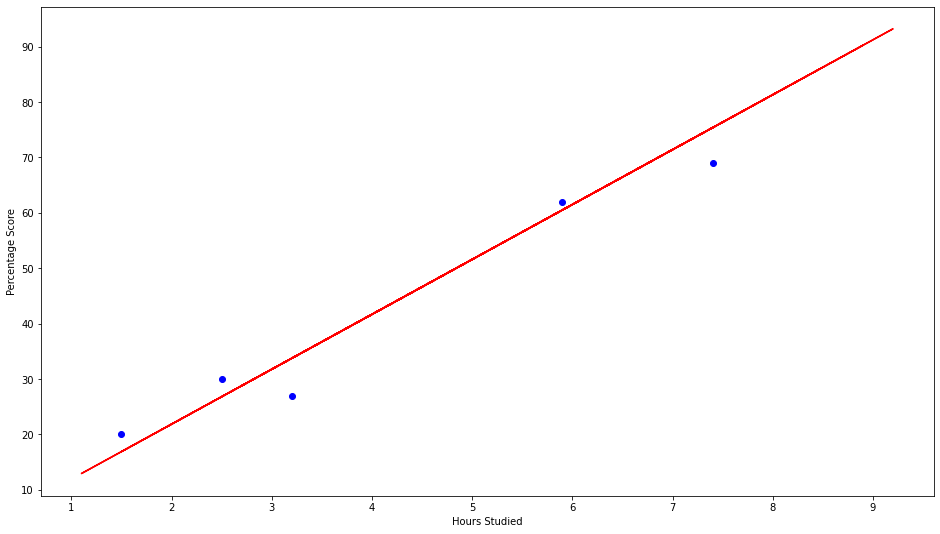

In [28]:

#testing data
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x_test, y_test, color="blue")
plt.plot(x, line, color="red")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [29]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [30]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

<h1>Predictions</h1>

In [32]:
 #predicting score
y_pred = regressor.predict(x_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [34]:
df=pd.DataFrame({'Actual': [y_test],'Prdicted':[y_pred]})
df

,Actual,Prdicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398048], [33.73226077948985], [7..."


In [37]:
#Tesing  own data
hours=9.25
own_pred = regressor.predict([[hours]])
print(f"If person studied for {hours} then predicted scores are {own_pred[0]}")

If person studied for 9.25 then predicted scores are [93.69173249]


<h1>Evaluating the model</h1>
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [38]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


<h1>Model Evaluation Metrics</h1>

In [39]:
#Checking the efficiency of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error_value=mean_squared_error(y_test,y_pred)
mean_absolute_error_value=mean_absolute_error(y_test,y_pred)
print(mean_squared_error_value)
print(mean_absolute_error_value)

21.598769307217406
4.183859899002975
